<a href="https://colab.research.google.com/github/MrRuicy/colab/blob/main/VGG_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 导入所需库及加载数据

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.models import vgg16, VGG16_Weights
import matplotlib.pyplot as plt
import numpy as np


# 1. 数据预处理与加载 ---------------------------------------------------------
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),  # 数据增强：随机裁剪
    transforms.RandomHorizontalFlip(),    # 数据增强：水平翻转
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465),
              (0.2023, 0.1994, 0.2010)),  # 均值、方差归一化
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465),
              (0.2023, 0.1994, 0.2010)),
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')



# VGG16

In [2]:
# 2. 模型构建：使用 torchvision 自带的 VGG16 ----------------------------------
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')

model = vgg16(weights=None)          # 从零开始训练
model.classifier[6] = nn.Linear(4096, 10)  # 修改最后一层输出为 10 类
model = model.to(device)

# 3. 定义损失函数和优化器 ------------------------------------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)

# 4. 训练函数 -----------------------------------------------------------------
def train(epoch):
    print(f'\nEpoch: {epoch}')
    model.train()
    running_loss = 0.0
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if batch_idx % 100 == 99:
            print(f'[{batch_idx + 1}/{len(trainloader)}] '
                  f'Loss: {running_loss / 100:.3f}')
            running_loss = 0.0

# 5. 测试函数 ------------------------------------------------------------------
def test():
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in testloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

    print(f'Test Accuracy: {100. * correct / total:.2f}%')

# 6. 正式开始训练 --------------------------------------------------------------
for epoch in range(1, 11):  # 训练 10 个 epoch
    train(epoch)
    test()


Using device: cuda

Epoch: 1
[100/391] Loss: 2.232
[200/391] Loss: 2.060
[300/391] Loss: 1.902
Test Accuracy: 37.53%

Epoch: 2
[100/391] Loss: 1.694
[200/391] Loss: 1.588
[300/391] Loss: 1.554
Test Accuracy: 49.41%

Epoch: 3
[100/391] Loss: 1.379
[200/391] Loss: 1.320
[300/391] Loss: 1.262
Test Accuracy: 57.41%

Epoch: 4
[100/391] Loss: 1.164
[200/391] Loss: 1.100
[300/391] Loss: 1.067
Test Accuracy: 64.74%

Epoch: 5
[100/391] Loss: 0.995
[200/391] Loss: 0.980
[300/391] Loss: 0.899
Test Accuracy: 69.78%

Epoch: 6
[100/391] Loss: 0.863
[200/391] Loss: 0.842
[300/391] Loss: 0.804
Test Accuracy: 72.85%

Epoch: 7
[100/391] Loss: 0.770
[200/391] Loss: 0.744
[300/391] Loss: 0.763
Test Accuracy: 74.85%

Epoch: 8
[100/391] Loss: 0.703
[200/391] Loss: 0.700
[300/391] Loss: 0.672
Test Accuracy: 78.65%

Epoch: 9
[100/391] Loss: 0.625
[200/391] Loss: 0.611
[300/391] Loss: 0.641
Test Accuracy: 78.39%

Epoch: 10
[100/391] Loss: 0.591
[200/391] Loss: 0.567
[300/391] Loss: 0.570
Test Accuracy: 81.84%


# VGG16+预训练权重

Using device: cuda
Epoch 1: Train Loss = 0.893
Test Accuracy: 80.53%
Epoch 2: Train Loss = 0.538
Test Accuracy: 84.83%
Epoch 3: Train Loss = 0.430
Test Accuracy: 85.16%
Epoch 4: Train Loss = 0.366
Test Accuracy: 87.09%
Epoch 5: Train Loss = 0.328
Test Accuracy: 88.01%
Epoch 6: Train Loss = 0.291
Test Accuracy: 87.82%
Epoch 7: Train Loss = 0.269
Test Accuracy: 88.21%
Epoch 8: Train Loss = 0.257
Test Accuracy: 88.64%
Epoch 9: Train Loss = 0.230
Test Accuracy: 89.02%
Epoch 10: Train Loss = 0.210
Test Accuracy: 89.05%


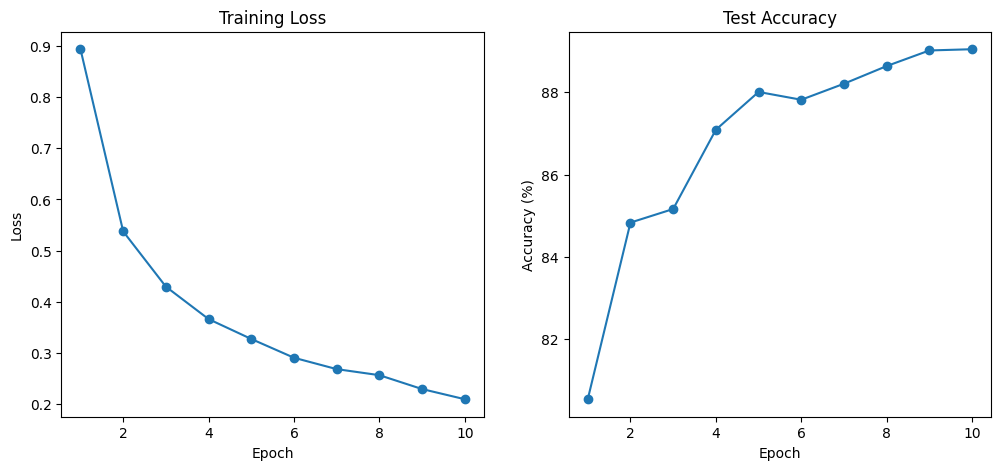

In [3]:
# 2. 模型构建 ---------------------------------------------------------
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')

# 加载 VGG16，并使用在 ImageNet 上训练好的预训练权重
model = vgg16(weights=VGG16_Weights.IMAGENET1K_V1)
model.classifier[6] = nn.Linear(4096, 10)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)

# 3. 定义训练和测试函数，并记录 loss & accuracy ----------------------------
train_losses = []
test_accuracies = []

def train(epoch):
    model.train()
    total_loss = 0
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(trainloader)
    train_losses.append(avg_loss)
    print(f'Epoch {epoch}: Train Loss = {avg_loss:.3f}')

def test():
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in testloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

    acc = 100. * correct / total
    test_accuracies.append(acc)
    print(f'Test Accuracy: {acc:.2f}%')

# 4. 正式开始训练 -------------------------------------------------------------
epochs = 10
for epoch in range(1, epochs + 1):
    train(epoch)
    test()

# 5. 可视化训练过程 -----------------------------------------------------------
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, marker='o')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), test_accuracies, marker='o')
plt.title('Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')

plt.show()


# 自定义 VGG-19 模型

CustomVGG19(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(

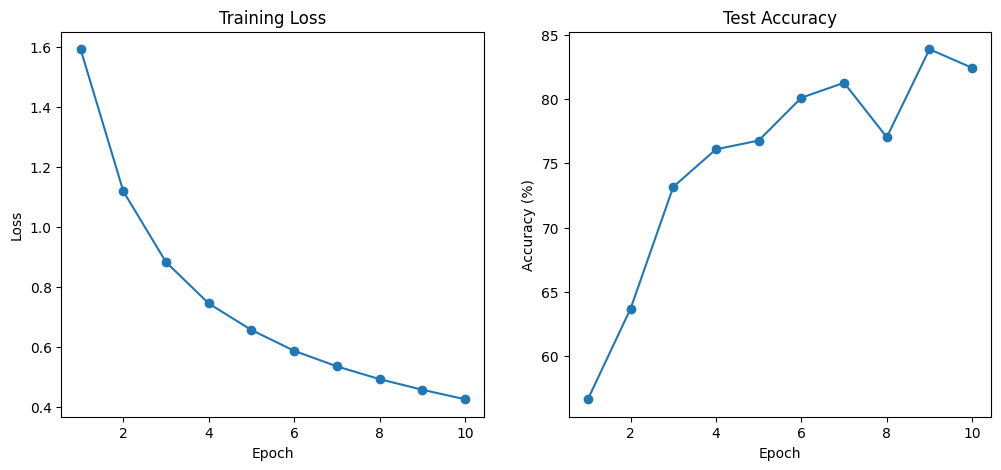

In [4]:
# -------------------------------
# 2. 自定义 VGG-19 模型
# -------------------------------
class CustomVGG19(nn.Module):
    def __init__(self, num_classes=10):
        super(CustomVGG19, self).__init__()
        self.features = self._make_layers([
            64, 64, 'M',
            128, 128, 'M',
            256, 256, 256, 256, 'M',
            512, 512, 512, 512, 'M',
            512, 512, 512, 512, 'M'
        ])
        self.classifier = nn.Sequential(
            nn.Linear(512, 512),
            nn.ReLU(True),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def _make_layers(self, cfg):
        layers = []
        in_channels = 3
        for v in cfg:
            if v == 'M':
                layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
            else:
                layers += [
                    nn.Conv2d(in_channels, v, kernel_size=3, padding=1),
                    nn.BatchNorm2d(v),
                    nn.ReLU(inplace=True)
                ]
                in_channels = v
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.features(x)
        x = nn.functional.adaptive_avg_pool2d(x, (1, 1))  # 输出 1*1 特征图
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = CustomVGG19(num_classes=10).to(device)
print(model)

# -------------------------------
# 3. 损失函数与优化器
# -------------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01,
                      momentum=0.9, weight_decay=5e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)

# -------------------------------
# 4. 训练和测试函数
# -------------------------------
train_losses = []
test_accuracies = []

def train(epoch):
    model.train()
    total_loss = 0
    for inputs, targets in trainloader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(trainloader)
    train_losses.append(avg_loss)
    print(f'Epoch {epoch}: Train Loss = {avg_loss:.3f}')

def test():
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in testloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
    acc = 100. * correct / total
    test_accuracies.append(acc)
    print(f'Test Accuracy: {acc:.2f}%')

# -------------------------------
# 5. 正式训练
# -------------------------------
num_epochs = 10
for epoch in range(1, num_epochs + 1):
    train(epoch)
    test()
    scheduler.step()

# -------------------------------
# 6. 可视化训练过程
# -------------------------------
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, marker='o')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), test_accuracies, marker='o')
plt.title('Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')

plt.show()
